In [1]:
import requests
import re
import os
import nltk
from bs4 import BeautifulSoup

from urllib.parse import urlsplit
from nltk.corpus import stopwords
from pyvi import ViTokenizer
from textblob import TextBlob
import shutil

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pyvi import ViTokenizer, ViPosTagger #pip install underthesea


# process

In [8]:
# Thư mục nguồn
source_dir = r'D:\22_Final\Data\Cau1\Cau1_ RawData'

# Thư mục đích
destination_dir = r'D:\22_Final\Data\Cau1\Cau1_ CleanData'


i=1

for file in os.listdir(source_dir):
    try:
        # Đọc nội dung của tệp
        with open(os.path.join(source_dir, file), 'r', encoding='utf-16') as f:
            text = f.read()

        text_pre=text.replace("\n","")    
        text_pre=text.lower() # Chuyển văn bản thành chữ thường    
        text_pre = re.sub(r"http(s)?://\S+", "", text_pre) # Loại bỏ URL
        text_pre=re.sub(r'[^\w\s]','',text_pre) # Xóa dấu câu
        text_pre = re.sub("\d+", " ", text_pre) # Xóa chữ số
        text_pre = re.sub(r"[!@#$[]()]'", "", text_pre) # Xoá kí tự đặc biệt: !@#$[]()
        text_pre = nltk.sent_tokenize(text_pre) # Tách câu
        text_pre = ''.join(text_pre)
        
        # Xóa các từ không có nghĩa (Stop Words);
        path=os.path.join(r"D:\22_Final\Data")
        f = open(path+r"\vietnamese-stopwords.txt", "r", encoding="utf-8")
        List_StopWords=f.read().split("\n")
        text_pre=" ".join(text_pre for text_pre in text_pre.split() if text_pre not in List_StopWords)

        text_pre = ViTokenizer.tokenize(text_pre) # Tách từ (Tokenizing)

        print (text_pre)

        # Ghi nội dung đã được tiền xử lý vào một tệp mới
        with open(os.path.join(destination_dir, f'Clean({i}).txt'), 'w',encoding='utf-16') as f:
            for word in text_pre:
                f.write(word)
        i+=1
    except:
        break

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7196\3288737036.py:20: SyntaxWarning: invalid escape sequence '\d'
  text_pre = re.sub("\d+", " ", text_pre) # Xóa chữ số


tiết trời se_se gió thoảng chiều tiết khóm hoa nở muộn vương_vấn sắc_màu hoa hạ_vẻ đẹp đằm_thắm sắc_đẹp phụ_nữ cảm sưu_tập thời_trang phố thúy nga design trình_làng sưu_tập chủ_đề chủ thiết_kế thời_trang gái hiện_đại phóng_khoáng mẽ duyên_dáng váy_đầm đi áo sơ_mi điệu đầm tiệc rực_rỡ sắc_màu xanh chuối đỏ vàng óng thể màu tím nâu màu thời_trang thiết_kế thúy nga design võ thị sáu công_trường lam sơn q tphcm mẫu khánh ngọc thùy nga ảnh tony vo
thiết_kế tham_gia tuần_lễ thời_trang việt nam xuânhè mẫu thời_trang xuânhè ntk trình_diễn chương_trình tuần_lễ thời_trang việt nam xuânhè hồ bơi sạn deawoo hà nội tuần_lễ thời_trang việt nam chương_trình công_ty may phương đông bắt vinatex fadin tạp_chí mốt việt_nam thực_hiện chương_trình đêm tuần_lễ đêm thiết_kế may phương đông mẫu jeans thực_hiện dây_chuyền sản_xuất công_nghệ trị_giá triệu usd khu_vực đông_nam mẫu trình_diễn tuần_lễ thời_trang việt nam xuânhè
vũ nguyễn hà chinh_phục làng thời_trang châu âu mẫu vũ nguyễn hà sinh_viên đại_học read

# Tan suat tu, WordCloud

In [9]:
filestore = r'D:\22_Final\Data\Cau1\Cau1_ CleanData'

text_pre = ''
for file in os.listdir(filestore):
  # Đọc nội dung của tệp
    with open(os.path.join(filestore, file), 'r', encoding='utf-16') as f:
        text = f.read()
        text_pre += text

text_pre1=nltk.word_tokenize(text_pre) # Tokenizing

print("Number of words: ",len(text_pre1))

frequency_dist = FreqDist(word.lower() for word in text_pre1)

## show only th top 50 results
print(frequency_dist.most_common(50))

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False) # top 50 từ đầu

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'd:\\22_Final\\\\Data\\\\Cau1\\\\Cau1_CleanData'

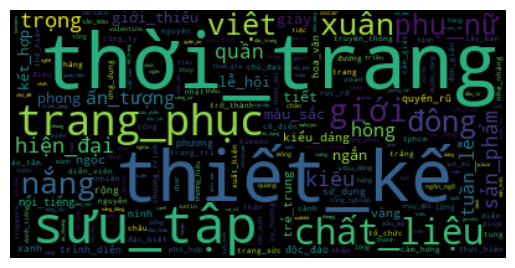

In [10]:
# WORD CLOUD
# Convert the text to a dictionary of word frequencies / Chuyển đổi văn bản thành từ điển tần số từ
word_counts = nltk.FreqDist(text_pre.split())
# Generate the word cloud / Tạo đám mây từ
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()